### **5. Тип данных Category**


✍ Важной частью предобработки данных является оптимизация хранения данных и работы с ними. В этом разделе мы поговорим об оптимизации работы с категориальными признаками.

ПРИЗНАКИ: КАТЕГОРИАЛЬНЫЕ И ЧИСЛОВЫЕ

Рассмотрим такие статистические термины, как категориальные и числовые признаки.

Под **числовыми** признаками обычно подразумевают признаки, которые отражают количественную меру и могут принимать значения из неограниченного диапазона.

Числовые признаки могут быть:

o	**дискретными** (например, количество комнат, пациентов, дней, отток сотрудников);
o	**непрерывными** (например, масса, цена, площадь).
Дискретные признаки чаще всего представлены целыми числами, а непрерывные — целыми числами и числами с плавающей точкой.

Под **категориальными** признаками обычно подразумевают столбцы в таблице, которые обозначают принадлежность объекта к какому-то классу/категории.

Категориальные признаки могут быть:

o	**номинальными** (например, пол, национальность, район);
o	**порядковыми** (например, уровень образования, уровень комфорта, стадия заболевания).
Такие признаки имеют ограниченный набор значений. Они чаще всего представлены в виде текстового описания и кодируются в Pandas типом данных object.

Однако это не всегда так. Например, созданный нами ранее признак месяца продажи кодируется числом (от 1 до 12), но на самом деле является категориальным, поскольку диапазон его значений ограничен и каждому числу мы можем поставить в соответствие название месяца.

?Возникает вопрос: а какие признаки стоит считать категориальными?

Однозначного ответа на этот вопрос нет. Решение, какой признак отнести к классу категорий, остаётся за исследователем. Некоторые специалисты даже относят количественные признаки в разряд категориальных, когда диапазон возможных значений довольно мал. 

Не существует жёсткого правила, определяющего, сколько значений должна иметь категориальная переменная. Вы должны использовать собственные знания о предметной области, чтобы сделать выбор. Однако в этом разделе мы всё же введём некоторые рекомендации.

ДОПОЛНИТЕЛЬНО

На самом деле классификация признаков уходит даже глубже 

ПОЧЕМУ ТАК ВАЖНО ОТЛИЧАТЬ КАТЕГОРИАЛЬНЫЕ СТОЛБЦЫ ОТ ДРУГИХ?

→ Оказывается, анализ и предобработка категориальных признаков отличается от предобработки числовых признаков.

Мы уже видели, что в столбцах с типом данных object мы не можем рассчитать среднее значение, стандартное отклонение или другие статистические параметры, которые годятся только для чисел.

Способ заполнения пропущенных данных и поиск аномальных значений также различаются для разных типов признаков, но этот момент мы рассмотрим в модуле по очистке данных.

КАТЕГОРИИ В ДАННЫХ О НЕДВИЖИМОСТИ

Давайте определим число уникальных категорий в каждом столбце нашей таблицы melb_df. Для этого создадим вспомогательную таблицу unique_counts:


In [ ]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in melb_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, melb_df[col].nunique(),melb_df[col].dtypes) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)


 
Разберём код подробнее:

1	Создаём пустой список, в который будем добавлять кортежи: имя столбца, количество уникальных значений в нём и тип столбца.

2	В цикле перебираем имена столбцов, которые получаем с помощью атрибута columns. В переменной col на каждой итерации находятся имена столбцов — обращаемся к ним в цикле и извлекаем число уникальных элементов с помощью метода nunique(), а также тип столбца с помощью атрибута dtypes. Результат заносим в кортеж и добавляем его в список.

3	Из списка с кортежами (имя столбца, количество уникальных значений в нём, тип столбца) создаём DataFrame, даём названия его столбцам: Column_Name, Num_unique и Type.

4	Сортируем таблицу по столбцу Num_unique в порядке возрастания количества уникальных элементов с помощью метода sort_values() и выводим результат на экран.

*Примечание*. Мы ещё не изучали сортировку DataFrame методом sort_values() — данную тему мы обсудим в следующем модуле, однако здесь эта функция необходима для более наглядной интерпретации результата.

Итак, с помощью такого несложного кода мы смогли получить вспомогательную таблицу, где в отсортированном виде показано количество уникальных значений во всех столбцах и их типы.

?Что интересного мы можем узнать из такой таблицы?

Если присмотреться внимательно, можно увидеть резкий скачок количества уникальных значений, начиная с 14 строки таблицы, где число уникальных значений составляет 152. Учтём этот момент.

Условимся, что категориальными будем считать признаки, у которых число уникальных категорий меньше 150. 

Однако учтём, что признак Date (дата продажи), преобразованный нами ранее в формат datetime, является временным признаком, поэтому далее не будем его воспринимать как категориальный. 

К тому же в наш потенциальный список попали количественные столбцы Rooms, Car, Bedroom и Bathroom. Договоримся, что мы не будем относить их к разряду категориальных, однако, как упоминалось ранее, такое тоже вполне возможно.

*Примечание*. Ещё раз подчеркиваем, что такая классификация признаков является исключительно субъективной и специфична для задачи.



ТИП ДАННЫХ CATEGORY

Для хранения и оптимизации работы с категориальными признаками в Pandas предусмотрен специальный тип данных — category.

→ Этот тип данных является гибридным: внешне он выглядит как строка, но внутренне представлен массивом целых чисел. Так как данные вместо изначальных строк хранятся в памяти как число, то объём памяти, занимаемой таблицей при использовании типа category, резко уменьшается, что повышает эффективность хранения и работы с таблицей.

→ Более того, этот тип данных расширяет возможности работы с категориальными признаками: мы можем легко преобразовывать категории, строить графики по таким данным (что сложно сделать для типа данных object). Также резко повышается производительность операций, совершаемых с такими столбцами.

Самый простой способ преобразования столбцов к типу данных category — это использование уже знакомого нам метода astype(), в параметры которого достаточно передать строку 'category'.

Рассмотрим это на примере.

Для начала, выведем информацию о памяти, занимаемой текущей таблицей, с помощью метода info():


In [ ]:
display(melb_df.info())


Текущий объём памяти — 2.7 Мб.

*Примечание*. Объём занимаемой памяти и количество столбцов на вашем компьютере может отличаться в зависимости от того, выполняли ли вы код и задания из предыдущих разделов на добавление и преобразование данных в таблице.
Сделаем преобразование столбцов к типу данных category:



In [ ]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

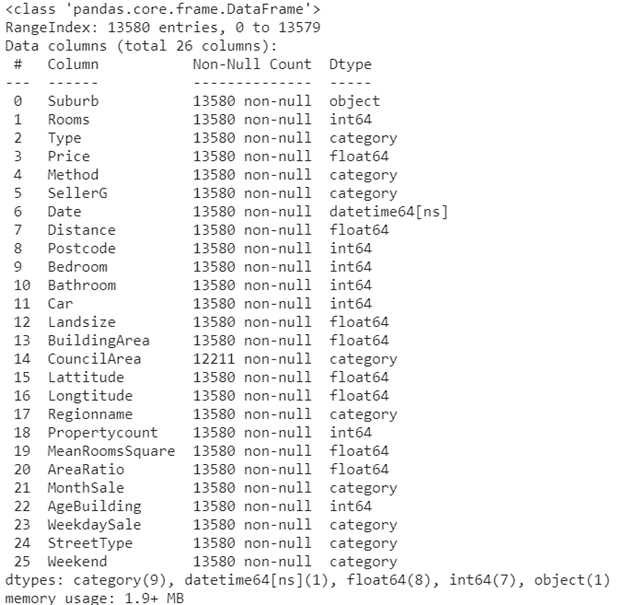


 
Разберём код подробнее:

1	Задаём список столбцов, которые мы не берём в рассмотрение (cols_to_exclude), а также условленный нами ранее порог уникальных значений столбца max_unique_count.

2	В цикле перебираем имена столбцов, и, если число уникальных категорий меньше заданного порога и имён столбцов нет в списке cols_to_exclude, то с помощью метода astype() приводим столбец к типу данных category.

3	Итоговый объём памяти — 1.9 Мб. В результате такого преобразования объём памяти, занимаемый таблицей, уменьшился почти в 1.5 раза. Это впечатляет!

Особенно хорошо такое преобразование работает на действительно больших данных, где число строк превышает сотни тысяч или миллионы. Иногда изменение типов может уменьшить объём памяти в десятки раз и существенно увеличить производительность.

ПОЛУЧЕНИЕ АТРИБУТОВ CATEGORY

У типа данных category есть свой специальный аксесcор cat, который позволяет получать информацию о своих значениях и преобразовывать их. Например, с помощью атрибута этого аксессора categories мы можем получить список уникальных категорий в столбце Regionname:


In [ ]:
print(melb_df['Regionname'].cat.categories)

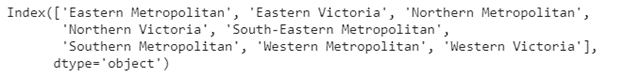


 
А теперь посмотрим, каким образом столбец кодируется в виде чисел в памяти компьютера. Для этого можно воспользоваться атрибутом codes:


In [ ]:
display(melb_df['Regionname'].cat.codes)

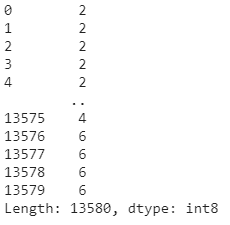


 
С помощью метода аксессора rename_categories() можно легко переименовать текущие значения категорий. Для этого в данный метод нужно передать словарь, ключи которого — старые имена категорий, а значения — новые.
Рассмотрим на примере: переименуем категории признака типа постройки Type — заменим их на полные названия (напомним, u — unit, h — house, t — townhouse).
melb_df['Type'] = melb_df['Type'].cat.rename_categories({
    'u': 'unit',
    't': 'townhouse',
    'h': 'house'
})
display(melb_df['Type'])
 
ДОПОЛНИТЕЛЬНО
Подробнее ознакомиться с другими возможностями типа данных category можно здесь. https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html 
ПОДВОДНЫЕ КАМНИ
А теперь представим ситуацию, что появилась новая партия домов и теперь мы продаём и квартиры (flat). Создадим объект Series new_houses_types, в котором будем хранить типы зданий новой партии домов. Преобразуем тип new_houses_types в такой же тип, как и у столбца Type в таблице melb_data, и выведем результат на экран:
new_houses_types = pd.Series(['unit', 'house', 'flat', 'flat', 'house'])
new_houses_types = new_houses_types.astype(melb_df['Type'].dtype)
display(new_houses_types)
 
Хммм... С нашими новыми объектами недвижимости произошло нечто странное. По какой-то причине вместо квартир мы получили пустые значения — NaN.
На самом деле причина проста: тип данных category хранит только категории, которые были объявлены при его инициализации. При встрече с новой, неизвестной ранее категорией, этот тип превратит её в пустое значение, так как он просто не знает о существовании этой категории.
Решить эту проблему на самом деле не сложно. Можно добавить категорию flat в столбец Type с помощью метода акссесора cat add_categories(), в который достаточно просто передать имя новой категории:
melb_df['Type'] = melb_df['Type'].cat.add_categories('flat')
new_houses_types = pd.Series(['unit', 'house', 'flat', 'flat', 'house'])
new_houses_types = new_houses_types.astype(melb_df['Type'].dtype)
display(new_houses_types)
 
Примечание. Добавление новой категории в столбец Type не отразится на самом столбце — текущие категории не изменятся, однако такое преобразование позволит добавлять в таблицу новые данные о домах с новой категорией — flat.
Из данного примера можно сделать вывод, что если набор категорий в столбце жёстко не зафиксирован и может обновляться в процессе работы, то тип category не является подходящим типом данных для этого столбца или необходимо постоянно писать проверки при обновлении таблицы.
Теперь, когда мы рассмотрели основные моменты и нюансы работы с типом данных category, можно сформулировать несколько рекомендаций по его использованию:
1	Необязательно каждый раз преобразовывать категориальные данные в тип данных category. Зачастую это делается исключительно для оптимизации работы с большими данными.
2	Если набор данных занимает значительный процент используемой оперативной памяти, рассмотрите возможность использования типа category.
3	Если у вас очень серьёзные проблемы с производительностью, обратите внимание на использование типа category.
4	Если вы решили использовать тип category, будьте осторожны при добавлении новой информации в вашу таблицу. Убедитесь, что вы собрали всю необходимую информацию, произведите предобработку данных и только после этого используйте преобразование типов.
✍ Мы рассмотрели основной подход в оптимизации работы с признаками, представленными в виде категорий. Предлагаем вам закрепить знания, выполнив несколько заданий ↓


***Задание 5.2***

При преобразовании столбцов таблицы о недвижимости к типу category мы оставили без внимания столбец Suburb (пригород). Давайте исправим это.
С помощью метода info() узнайте, сколько памяти занимает таблица melb_df.
Преобразуйте признак Suburb следующим образом: оставьте в столбце только 119 наиболее популярных пригородов, остальные замените на 'other'.
Приведите данные в столбце Suburb к категориальному типу.
В качестве ответа запишите разницу между объёмом занимаемой памяти до преобразования (который мы получили ранее в модуле) и после него в Мб. Ответ округлите до десятых.

(Подсказка (1 из 1): Чтобы перевести данные в тип category, можно воспользоваться методом astype())

(0.1)